# Problem Statement : What is the price of the potatoes at which most of the sellers are selling in a month in a particular market and what does it say about the demand, supply relation?

# Required Libraries

In [731]:
import pandas as pd
import numpy as np
import warnings  
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
warnings.filterwarnings("ignore")
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

In [732]:
url="https://agmarknet.gov.in/SearchCmmMkt.aspx?Tx_Commodity=24&Tx_State=UP&Tx_District=1&Tx_Market=0&DateFrom=01-Jan-2020&DateTo=31-Dec-2020&Fr_Date=01-Jan-2020&To_Date=31-Dec-2020&Tx_Trend=0&Tx_CommodityHead=Potato&Tx_StateHead=Uttar+Pradesh&Tx_DistrictHead=Agra&Tx_MarketHead=--Select--"
response=requests.get(url)
print(response.status_code) # check the permission to access the webpage

200


>**a. Write a python script to fetch data of prices for the year 2020 (date wise from 1st 
Jan’2020 to 31st Dec’2020) for district “Agra” of Uttar Pradesh from the data sources 
mentioned in the data section.** 

# Using Beautiful Soup to fetch the table


In [733]:
soup=BeautifulSoup(response.text,'html.parser')
t=soup.find_all('table',{'class':"tableagmark_new"})
t1=pd.read_html(str(t))
df_scrap=pd.DataFrame(t1[0])

In [734]:
df_scrap.head()


,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1.0,Agra,Achnera,Potato,Desi,FAQ,900.0,1000.0,950.0,30 Dec 2020
1,2.0,Agra,Achnera,Potato,Desi,FAQ,800.0,900.0,850.0,29 Dec 2020
2,3.0,Agra,Achnera,Potato,Desi,FAQ,850.0,950.0,900.0,28 Dec 2020
3,4.0,Agra,Achnera,Potato,Desi,FAQ,800.0,900.0,850.0,27 Dec 2020
4,5.0,Agra,Achnera,Potato,Desi,FAQ,800.0,900.0,850.0,26 Dec 2020


# Reading the excel file 

In [735]:
df=pd.read_excel("Agmarknet_Price_Report.xlsx")
df.shape

(1827, 10)

In [736]:
df.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27
4,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-26


>**b.  Identify major markets for the district “Agra” and plot price patterns for each of 
them. What patterns do you identify?** 

In [737]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Sl no.                     1827 non-null   int64         
 1   District Name              1827 non-null   object        
 2   Market Name                1827 non-null   object        
 3   Commodity                  1827 non-null   object        
 4   Variety                    1827 non-null   object        
 5   Grade                      1827 non-null   object        
 6   Min Price (Rs./Quintal)    1827 non-null   int64         
 7   Max Price (Rs./Quintal)    1827 non-null   int64         
 8   Modal Price (Rs./Quintal)  1827 non-null   int64         
 9   Price Date                 1827 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 142.9+ KB


df.info() shows no null values and also Price Date is also in the right format i.e datetime.So,we can directly plot the prices for each market in Agra.

In [738]:
df['Market Name'].unique()

array(['Achnera', 'Agra', 'Fatehabad', 'Fatehpur Sikri', 'Jagnair',
       'Jarar', 'Khairagarh', 'Samsabad'], dtype=object)

# Price Plot : Achnera

In [739]:
condition_Achnera=df['Market Name']=='Achnera'
df_Achnera=pd.DataFrame(data=df[condition_Achnera],columns=df.columns)

In [740]:
df_Achnera.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27
4,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-26


In [741]:
df_Achnera=df_Achnera.drop(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade'], axis=1)

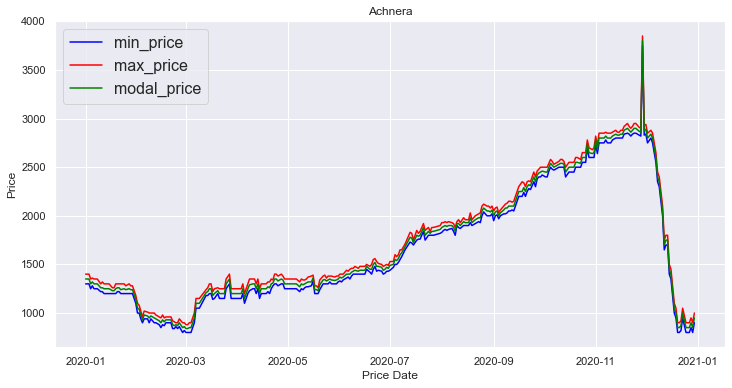

In [742]:
fig = plt.figure(figsize=(12,6))
min_price = plt.plot(df_Achnera['Price Date'],
        df_Achnera['Min Price (Rs./Quintal)'],
        color='blue')
max_price = plt.plot(df_Achnera['Price Date'],
        df_Achnera['Max Price (Rs./Quintal)'],
        color='red')
modal_price = plt.plot(df_Achnera['Price Date'],
        df_Achnera['Modal Price (Rs./Quintal)'],
        color='green')
plt.legend(['min_price', 'max_price', 'modal_price'], fontsize=16)
plt.title('Achnera')
plt.xlabel('Price Date')
plt.ylabel('Price')
fig.savefig('./Achnera_Prices.png')

# Price Plot : Agra

In [743]:
condition_Agra=df['Market Name']=='Agra'
df_Agra=pd.DataFrame(data=df[condition_Agra],columns=df.columns)

In [744]:
df_Agra.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
306,307,Agra,Agra,Potato,Desi,FAQ,800,1100,960,2020-12-31
307,308,Agra,Agra,Potato,Desi,FAQ,800,1050,940,2020-12-30
308,309,Agra,Agra,Potato,Desi,FAQ,800,1080,950,2020-12-29
309,310,Agra,Agra,Potato,Desi,FAQ,800,1100,950,2020-12-28
310,311,Agra,Agra,Potato,Desi,FAQ,850,1100,980,2020-12-26


In [745]:
df_Agra=df_Agra.drop(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade'], axis=1)

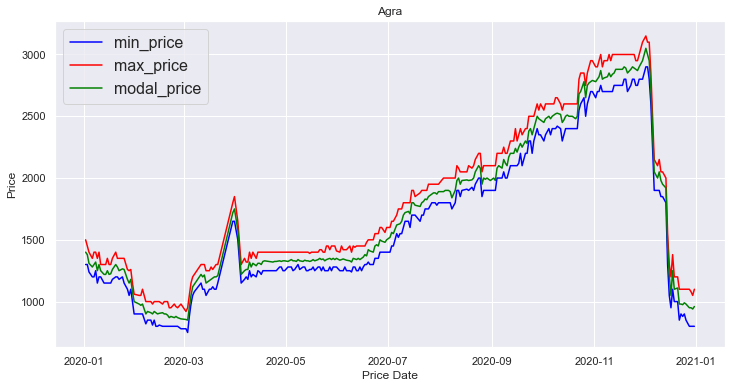

In [746]:
fig = plt.figure(figsize=(12,6))
min_price = plt.plot(df_Agra['Price Date'],
        df_Agra['Min Price (Rs./Quintal)'],
        color='blue')
max_price = plt.plot(df_Agra['Price Date'],
        df_Agra['Max Price (Rs./Quintal)'],
        color='red')
modal_price = plt.plot(df_Agra['Price Date'],
        df_Agra['Modal Price (Rs./Quintal)'],
        color='green')
plt.legend(['min_price', 'max_price', 'modal_price'], fontsize=16)
plt.title('Agra')
plt.xlabel('Price Date')
plt.ylabel('Price')
fig.savefig('./Agra_Prices.png')

# Price Plot : Fatehabad

In [747]:
condition_Fatehabad=df['Market Name']=='Fatehabad'
df_Fatehabad=pd.DataFrame(data=df[condition_Fatehabad],columns=df.columns)

In [748]:
df_Fatehabad.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
591,592,Agra,Fatehabad,Potato,Desi,FAQ,700,800,750,2020-12-31
592,593,Agra,Fatehabad,Potato,Desi,FAQ,800,900,850,2020-12-30
593,594,Agra,Fatehabad,Potato,Desi,FAQ,800,900,850,2020-12-28
594,595,Agra,Fatehabad,Potato,Desi,FAQ,850,950,900,2020-12-27
595,596,Agra,Fatehabad,Potato,Desi,FAQ,800,900,850,2020-12-26


In [749]:
df_Fatehabad=df_Fatehabad.drop(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade'], axis=1)

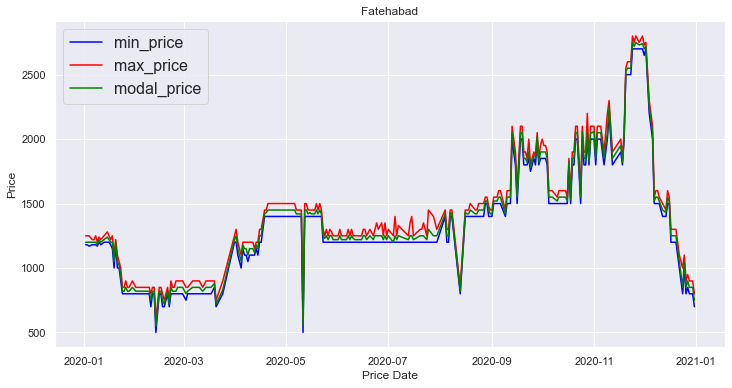

In [750]:
fig = plt.figure(figsize=(12,6))
min_price = plt.plot(df_Fatehabad['Price Date'],
        df_Fatehabad['Min Price (Rs./Quintal)'],
        color='blue')
max_price = plt.plot(df_Fatehabad['Price Date'],
        df_Fatehabad['Max Price (Rs./Quintal)'],
        color='red')
modal_price = plt.plot(df_Fatehabad['Price Date'],
        df_Fatehabad['Modal Price (Rs./Quintal)'],
        color='green')
plt.legend(['min_price', 'max_price', 'modal_price'], fontsize=16)
plt.title('Fatehabad')
plt.xlabel('Price Date')
plt.ylabel('Price')
fig.savefig('./Fatehabad_Prices.png')

# Price Plot : Fatehpur Sikri

In [751]:
condition_FatehpurSikri=df['Market Name']=='Fatehpur Sikri'
df_FatehpurSikri=pd.DataFrame(data=df[condition_FatehpurSikri],columns=df.columns)

In [752]:
df_FatehpurSikri.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
849,850,Agra,Fatehpur Sikri,Potato,Local,FAQ,900,1100,1015,2020-12-31
850,851,Agra,Fatehpur Sikri,Potato,Local,FAQ,1000,1120,1065,2020-12-30
851,852,Agra,Fatehpur Sikri,Potato,Local,FAQ,900,1200,1040,2020-12-29
852,853,Agra,Fatehpur Sikri,Potato,Local,FAQ,1000,1200,1095,2020-12-28
853,854,Agra,Fatehpur Sikri,Potato,Local,FAQ,1000,1200,1080,2020-12-26


In [753]:
df_FatehpurSikri=df_FatehpurSikri.drop(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade'], axis=1)

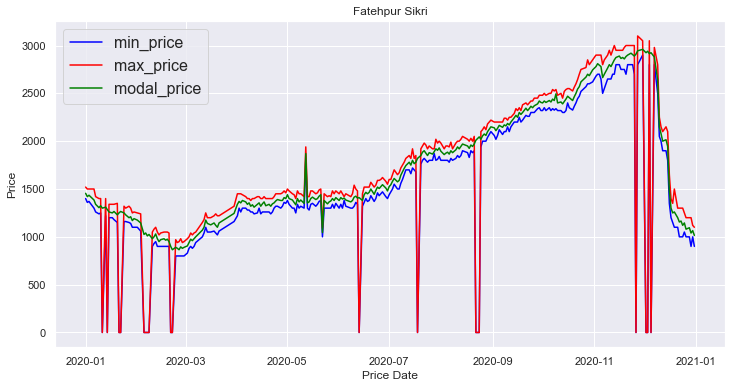

In [754]:
fig = plt.figure(figsize=(12,6))
min_price = plt.plot(df_FatehpurSikri['Price Date'],
        df_FatehpurSikri['Min Price (Rs./Quintal)'],
        color='blue')
max_price = plt.plot(df_FatehpurSikri['Price Date'],
        df_FatehpurSikri['Max Price (Rs./Quintal)'],
        color='red')
modal_price = plt.plot(df_FatehpurSikri['Price Date'],
        df_FatehpurSikri['Modal Price (Rs./Quintal)'],
        color='green')
plt.legend(['min_price', 'max_price', 'modal_price'], fontsize=16)
plt.title('Fatehpur Sikri')
plt.xlabel('Price Date')
plt.ylabel('Price')
fig.savefig('./FatehpurSikri_Prices.png')

# Price Plot : Jagnair

In [755]:
condition_Jagnair=df['Market Name']=='Jagnair'
df_Jagnair=pd.DataFrame(data=df[condition_Jagnair],columns=df.columns)

In [756]:
df_Jagnair.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1139,1140,Agra,Jagnair,Potato,Desi,FAQ,750,850,800,2020-12-31
1140,1141,Agra,Jagnair,Potato,Desi,FAQ,800,900,850,2020-12-30
1141,1142,Agra,Jagnair,Potato,Desi,FAQ,800,860,830,2020-12-29
1142,1143,Agra,Jagnair,Potato,Desi,FAQ,800,900,850,2020-12-28
1143,1144,Agra,Jagnair,Potato,Desi,FAQ,800,900,850,2020-12-27


In [757]:
df_Jagnair=df_Jagnair.drop(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade'], axis=1)

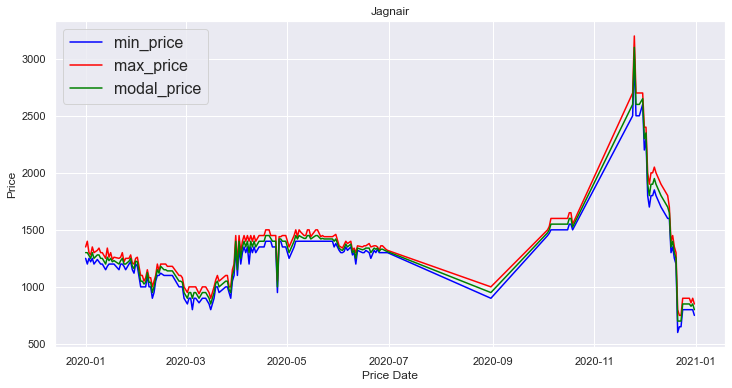

In [758]:
fig = plt.figure(figsize=(12,6))
min_price = plt.plot(df_Jagnair['Price Date'],
        df_Jagnair['Min Price (Rs./Quintal)'],
        color='blue')
max_price = plt.plot(df_Jagnair['Price Date'],
        df_Jagnair['Max Price (Rs./Quintal)'],
        color='red')
modal_price = plt.plot(df_Jagnair['Price Date'],
        df_Jagnair['Modal Price (Rs./Quintal)'],
        color='green')
plt.legend(['min_price', 'max_price', 'modal_price'], fontsize=16)
plt.title('Jagnair')
plt.xlabel('Price Date')
plt.ylabel('Price')
fig.savefig('./Jagnair_Prices.png')

# Price Plot : Jarar

In [759]:
condition_Jarar=df['Market Name']=='Jarar'
df_Jarar=pd.DataFrame(data=df[condition_Jarar],columns=df.columns)

In [760]:
df_Jarar.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1326,1327,Agra,Jarar,Potato,Desi,FAQ,2550,2750,2650,2020-10-30
1327,1328,Agra,Jarar,Potato,Desi,FAQ,1100,1200,1150,2020-06-30
1328,1329,Agra,Jarar,Potato,Desi,FAQ,1100,1200,1150,2020-06-29
1329,1330,Agra,Jarar,Potato,Desi,FAQ,1100,1200,1150,2020-06-27
1330,1331,Agra,Jarar,Potato,Desi,FAQ,1100,1200,1150,2020-06-26


In [761]:
df_Jarar=df_Jarar.drop(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade'], axis=1)

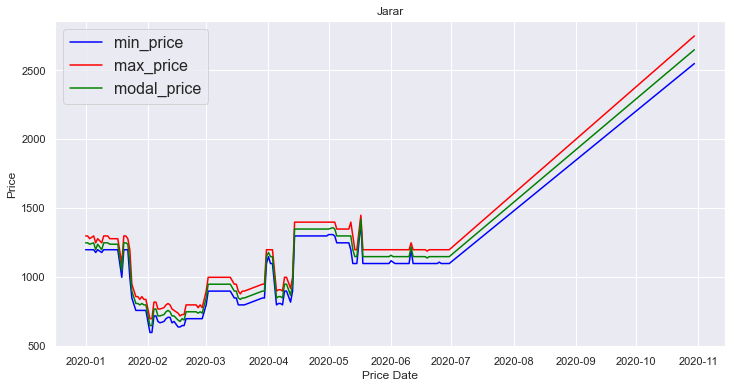

In [762]:
fig = plt.figure(figsize=(12,6))
min_price = plt.plot(df_Jarar['Price Date'],
        df_Jarar['Min Price (Rs./Quintal)'],
        color='blue')
max_price = plt.plot(df_Jarar['Price Date'],
        df_Jarar['Max Price (Rs./Quintal)'],
        color='red')
modal_price = plt.plot(df_Jarar['Price Date'],
        df_Jarar['Modal Price (Rs./Quintal)'],
        color='green')
plt.legend(['min_price', 'max_price', 'modal_price'], fontsize=16)
plt.title('Jarar')
plt.xlabel('Price Date')
plt.ylabel('Price')
fig.savefig('./Jarar_Prices.png')

# Price Plot : Khairagarh

In [763]:
condition_Khairagarh=df['Market Name']=='Khairagarh'
df_Khairagarh=pd.DataFrame(data=df[condition_Khairagarh],columns=df.columns)

In [764]:
df_Khairagarh.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1472,1473,Agra,Khairagarh,Potato,Desi,FAQ,1100,1200,1150,2020-12-31
1473,1474,Agra,Khairagarh,Potato,Desi,FAQ,1100,1200,1150,2020-12-30
1474,1475,Agra,Khairagarh,Potato,Desi,FAQ,1500,1600,1550,2020-12-29
1475,1476,Agra,Khairagarh,Potato,Desi,FAQ,1500,1600,1550,2020-12-28
1476,1477,Agra,Khairagarh,Potato,Desi,FAQ,1500,1600,1550,2020-12-27


In [765]:
df_Khairagarh=df_Khairagarh.drop(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade'], axis=1)

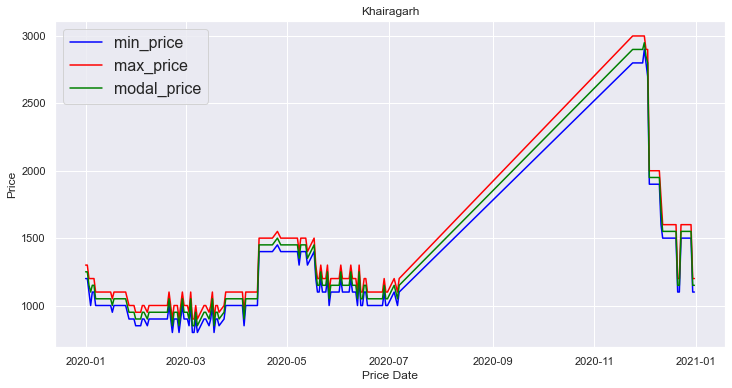

In [766]:
fig = plt.figure(figsize=(12,6))
min_price = plt.plot(df_Khairagarh['Price Date'],
        df_Khairagarh['Min Price (Rs./Quintal)'],
        color='blue')
max_price = plt.plot(df_Khairagarh['Price Date'],
        df_Khairagarh['Max Price (Rs./Quintal)'],
        color='red')
modal_price = plt.plot(df_Khairagarh['Price Date'],
        df_Khairagarh['Modal Price (Rs./Quintal)'],
        color='green')
plt.legend(['min_price', 'max_price', 'modal_price'], fontsize=16)
plt.title('Khairagarh')
plt.xlabel('Price Date')
plt.ylabel('Price')
fig.savefig('./Khairagarh_Prices.png')

# Price Plot : Samsabad

In [767]:
condition_Samsabad=df['Market Name']=='Samsabad'
df_Samsabad=pd.DataFrame(data=df[condition_Samsabad],columns=df.columns)

In [768]:
df_Samsabad.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1659,1660,Agra,Samsabad,Potato,Local,FAQ,2700,2800,2750,2020-10-31
1660,1661,Agra,Samsabad,Potato,Local,FAQ,1950,2050,2000,2020-08-28
1661,1662,Agra,Samsabad,Potato,Local,FAQ,1400,1600,1500,2020-07-07
1662,1663,Agra,Samsabad,Potato,Local,FAQ,1300,1500,1400,2020-07-06
1663,1664,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,2020-07-05


In [769]:
df_Samsabad=df_Samsabad.drop(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade'], axis=1)

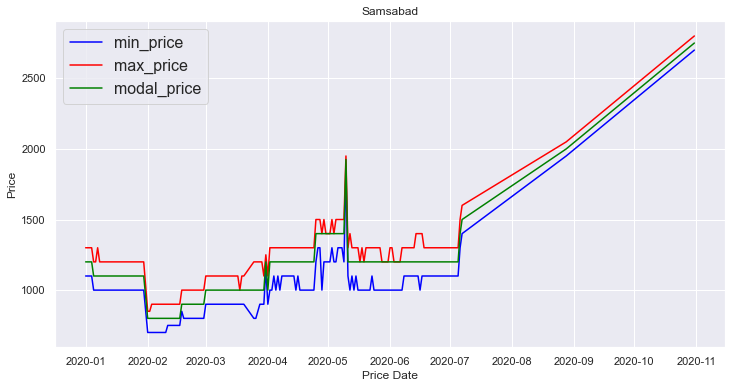

In [770]:
fig = plt.figure(figsize=(12,6))
min_price = plt.plot(df_Samsabad['Price Date'],
        df_Samsabad['Min Price (Rs./Quintal)'],
        color='blue')
max_price = plt.plot(df_Samsabad['Price Date'],
        df_Samsabad['Max Price (Rs./Quintal)'],
        color='red')
modal_price = plt.plot(df_Samsabad['Price Date'],
        df_Samsabad['Modal Price (Rs./Quintal)'],
        color='green')
plt.legend(['min_price', 'max_price', 'modal_price'], fontsize=16)
plt.title('Samsabad')
plt.xlabel('Price Date')
plt.ylabel('Price')
fig.savefig('./Samsabad_Prices.png')

# VAR Model : Fatehpur Sikri

In [771]:
df_FatehpurSikri_diff = df_FatehpurSikri.drop(['Price Date'], axis=1)
df_FatehpurSikri_diff.index = df_FatehpurSikri['Price Date']

### Johansen Test (To check stationarity)

Johansen test is used to check the stationarity of the time series.The resultants are the eigen values of all the variables.If eigen values are less than 1, then the time series is stationary and we can apply VAR model or else we need to perform differencing.

In [772]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
coint_johansen(df_FatehpurSikri_diff,-1,1).eig  

array([2.37874118e-01, 8.55841026e-02, 1.31131163e-04])

In [773]:
df_FatehpurSikri_diff1 = df_FatehpurSikri_diff.diff().dropna()

In [774]:
coint_johansen(df_FatehpurSikri_diff1,-1,1).eig

array([0.63831102, 0.58466044, 0.30651394])

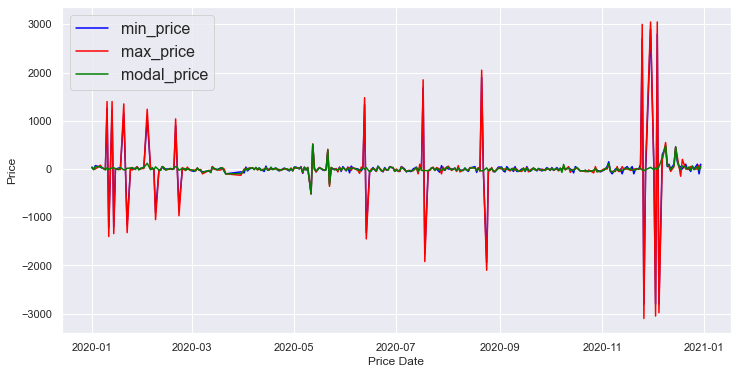

In [775]:
fig = plt.figure(figsize=(12,6))
min_price = plt.plot(df_FatehpurSikri_diff1['Min Price (Rs./Quintal)'],
        color='blue')
max_price = plt.plot(df_FatehpurSikri_diff1['Max Price (Rs./Quintal)'],
        color='red')
modal_price = plt.plot(df_FatehpurSikri_diff1['Modal Price (Rs./Quintal)'],
        color='green')
plt.legend(['min_price', 'max_price', 'modal_price'], fontsize=16)
plt.xlabel('Price Date')
plt.ylabel('Price')
fig.savefig('./FatehpurSikri_Prices_diff.png')

In [776]:
model = VAR(df_FatehpurSikri_diff1)
model_fit = model.fit(maxlags=30)

In [777]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 16, Sep, 2021
Time:                     21:48:07
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    30.6497
Nobs:                     259.000    HQIC:                   28.4079
Log likelihood:          -4313.14    FPE:                5.29064e+11
AIC:                      26.9006    Det(Omega_mle):     2.14390e+11
--------------------------------------------------------------------
Results for equation Min Price (Rs./Quintal)
                                   coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------
const                                 6.782275        23.145892            0.293           0.770
L1.Min Price (Rs./Quintal)            0.949131         0.896512            

### Equation of our model which predicts Modal Price (Rs./Quintal) in Fatehpur Sikri market at time t

$$
\hat{fs-modal}_t = -0.49modal_{t-1} - 0.23modal_{t-2} + 0.263modal_{t-7} + 0.34modal_{t-8} + 0.161modal_{t-25} - 0.51min_{t-28} + 0.44max_{t-28} 
$$

In [778]:
results = model.fit(maxlags=28, ic='aic')
lag_order = results.k_ar
results.forecast(df_Achnera_diff1.values[-lag_order:], 5)

array([[-21.44957297, -26.45662639,   0.67765307],
       [ 32.98119321,  33.97713492,   8.71472005],
       [-54.84582077, -62.46836299,  -1.10792756],
       [-15.2558156 , -13.78732443,   6.14674639],
       [100.5229982 , 104.40602659,  11.57596935]])

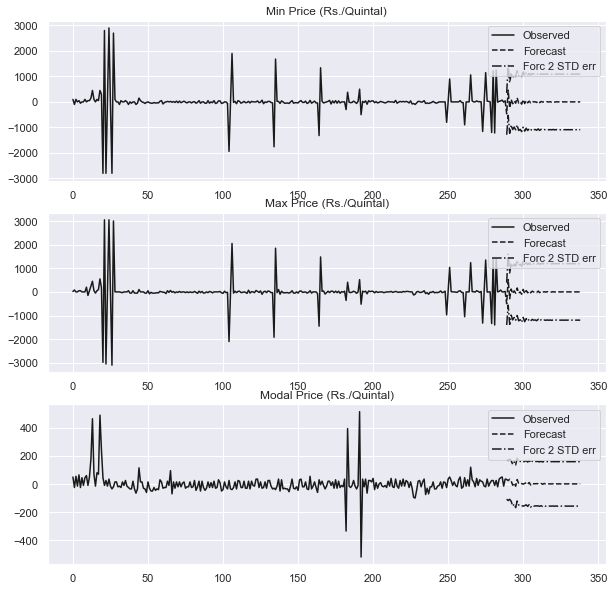

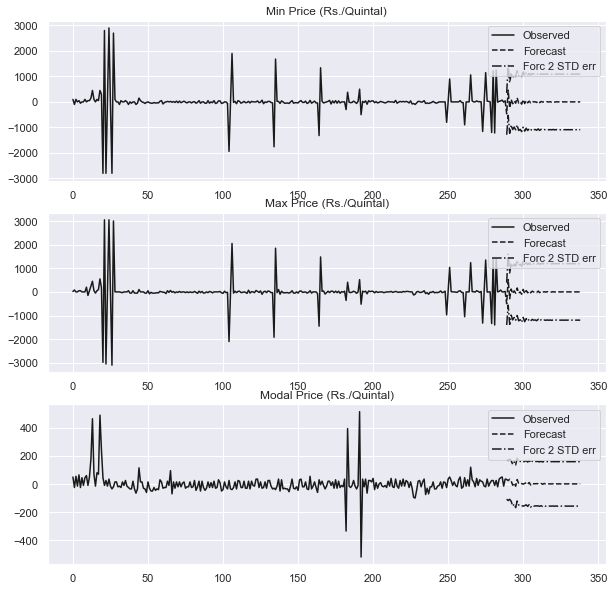

In [721]:
results.plot_forecast(50)

The forecasts for 50 steps is plotted in the above graphs.In Modal Price(Rs./Quintal), we find them in a steady manner which say that the lags we decided are satisfactory and also the predictions are good.